## Plotting regular waves per probe per file

In [229]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import hilbert

In [230]:
def get_waves(frequency, amplitude):
    data_list = [["time"],["Probe 1"],["Probe 2"],["Probe 3"], ["Probe 4"], ["Probe 5"]]
    freq = str(frequency).replace(".","")
    filename = "F" + freq + "A" + str(amplitude)
    with open('Experimental Data-20201218/' + filename + ".txt") as txt:
        for row in txt.readlines():
            row_list = row.strip().split(" ")
            for i in range(len(data_list)):
                data_list[i].append(float(row_list[i]))
    # print(data_list)
    return data_list

In [231]:
def plot_waves(data_list, frequency, amplitude,chunk,probe):
    beginning = int(len(data_list[0])/chunk)
    freq = str(frequency).replace(".","")
    filename = "F" + freq + "A" + str(amplitude)
    plt.figure(figsize=(10,5))
    plt.title("Regular Waves Plot: Frequency: " + str(frequency) + "Hz, Amplitude: " + str(amplitude) + "cm")
    plt.xlabel("time/sec")
    plt.ylabel("wave height/cm")
    analytic_signal = hilbert(data_list[probe][1:])
    amplitude_envelope = np.abs(analytic_signal)
    amplitude_envelope_bottom = []
    for amplitude in amplitude_envelope:
        amplitude_envelope_bottom.append(-1 * amplitude)
    plt.plot(data_list[0][1:beginning],data_list[probe][1:beginning],label=data_list[probe][0])
    plt.plot(data_list[0][1:beginning],amplitude_envelope[1:beginning],label="Probe {} envelope".format(probe),color="red")
    plt.plot(data_list[0][1:beginning],amplitude_envelope_bottom[1:beginning],color="red")
    plt.legend()
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.savefig("graphs/" + filename + "Probe" + str(probe) + "Envelope.png")
    plt.show()

In [232]:
def get_envelopes(data_list,frequency, amplitude,chunk):
    beginning = int(len(data_list[0])/chunk)
    freq = str(frequency).replace(".","")
    filename = "F" + freq + "A" + str(amplitude)
    plt.figure(figsize=(11,4))
    plt.title("Regular Waves Envelope Plot: Frequency: " + str(frequency) + "Hz, Amplitude: " + str(amplitude) + "cm")
    plt.xlabel("time/sec")
    plt.ylabel("wave height/cm")
    analytic_signal_1 = hilbert(data_list[1][1:])
    amplitude_envelope_1 = np.abs(analytic_signal_1)
    analytic_signal_5 = hilbert(data_list[5][1:])
    amplitude_envelope_5 = np.abs(analytic_signal_5)
    plt.plot(data_list[0][1:beginning],amplitude_envelope_1[1:beginning],label="Probe 1 envelope")
    plt.plot(data_list[0][1:beginning],amplitude_envelope_5[1:beginning],label="Probe 5 envelope")
    plt.legend()
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.axhline(y=amplitude,color="red")
    plt.axvline(x=0, color='k')
    plt.savefig("graphs/" + filename + "Probes1and5Envelope.png")
    plt.show()

In [233]:
waves1 = get_waves(0.5,4)
waves2 = get_waves(1.0,3)
waves3 = get_waves(1.5,2)

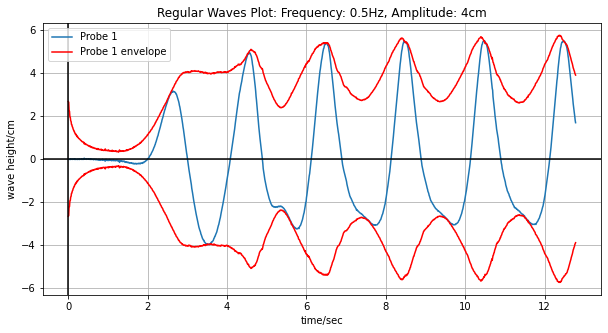

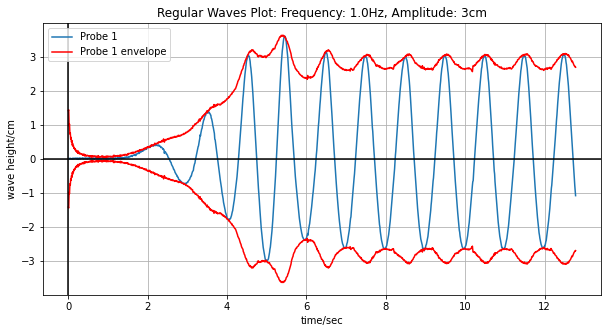

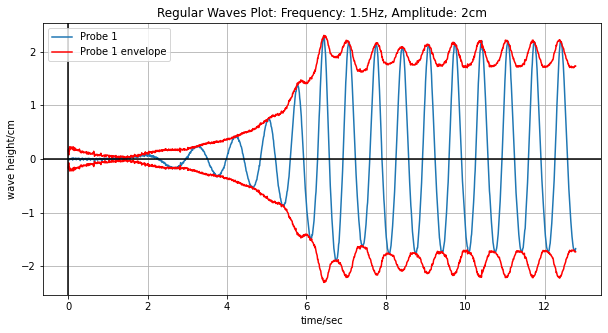

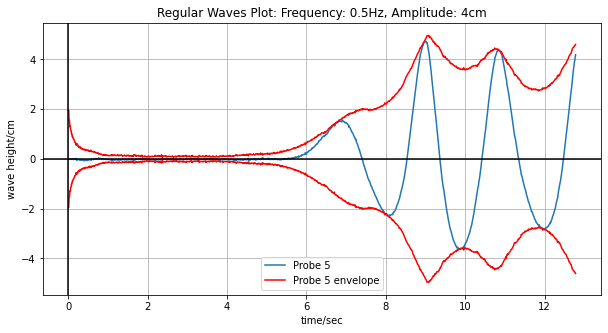

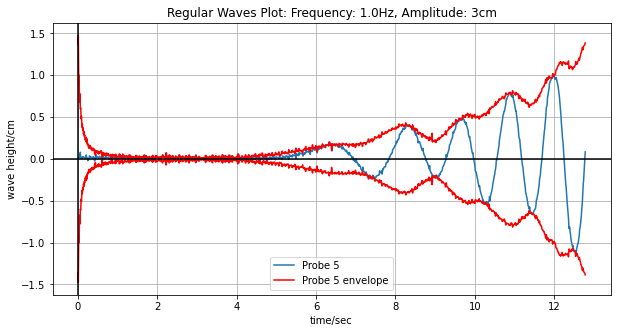

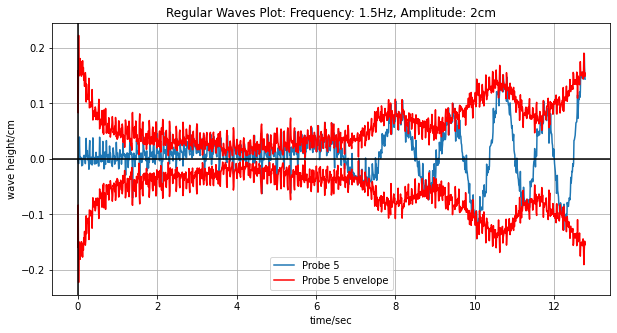

In [234]:
plot_waves(waves1, 0.5,4,5,1)
plot_waves(waves2, 1.0,3,5,1)
plot_waves(waves3, 1.5,2,5,1)
plot_waves(waves1, 0.5,4,5,5)
plot_waves(waves2, 1.0,3,5,5)
plot_waves(waves3, 1.5,2,5,5)

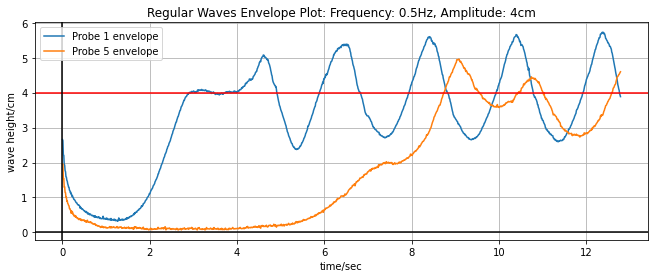

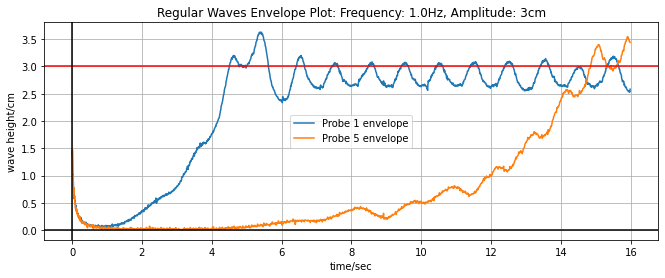

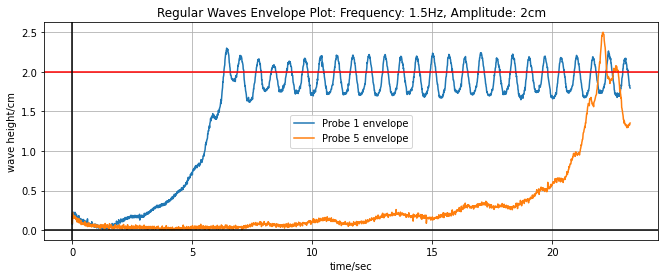

In [235]:
get_envelopes(waves1,0.5,4,5)
get_envelopes(waves2,1.0,3,4)
get_envelopes(waves3,1.5,2,2.75)